## 기본 개념

마스터 알고리즘, 생각에 대한 생각 책 보자.

요즘에는 무조건 앙상블 시킨다. 머신러닝은 정확하게 성능측정할 수 없다. 어떤 데이터에서 어떤 메드릭을 측정했을 때, 정확도나 F1-score가 얼마가 나왔다고 씨부려야 한다.

- linear vs nonlinear: 뭐가 더 좋냐? 상황에 따라 다르다. 곡선이 더 세분하게 찾을 수 있으나, 데이터가 많이 든다. 곡선은 또 설명하기 어렵다. 통계족은 근데 설명이 중요하기 때문에 리니어 모델을 많이 쓴다. 통계쪽 사람들이 주장하는 것은 세상의 기반에는 리니어가 기반이 되어 있다는 것이다. 복잡한 법칙 안에는 단순한 법칙들이 숨어있다고 믿는다.
- blackbos vs descriptive
- First-principle vs data-driven
- Stochastic vs deterministic
- flatten vs hierachical(중첩): stacking이 대표적으로 하이어라키이다. 

딥러닝은 논리니어, 블랙박스, 데이터 드리븐, 스토캐스틱(초기화 할때 랜덤), 하이어라키.

기계학습은 알고리즘 선택이 중요하고, 딥러닝은 층짜는 것이 중요하다.

## 강한 인공지능 vs 약한 인공지능

강한 인공지능은 모든걸 해결할 수 있다는 것이고, 약한 인공지능은 일부만 해결할 수 있다는 것.

우린 표본을 가지고 해야 하는데, 이 표본은 대표성을 가지고 있어야 한다. 데이터는 많을 수록 좋다 (큰수의 법칙)

자연현상들은 대부분 정규분포를 띈다.

----

하이퍼파라미터는 자기 스스로 학습할 수 없는 애다. 똑같은 데이터 성능 높이기 위해 1. 알고리즘 + 하이퍼파라미터 튜닝까지 다 해야 한다.

## 최적의 성능

자연어처리에서는 accuracy를 말하는 순간 사기꾼이다. 영상처리에서는 또 다른 척도를 쓴다.

일반덕으로 최적의 성능이라고 하면, 한번도 없는 unseen 데이터에서도 일반화 되면 최적의 성능이라고 한다.

오버피팅이 되면, varience가 크다고 한다. 이건 아주 민감하다. varience가 큰 모델을 오버피팅된다고 한다.

---

오버피팅은 학습데이터에서 성능좋고, 테스트데이터에서 성능 나쁘면 오버피팅 됬다고 하는데, 일부만 맞는 이야기이다.

근데 일반화 시킬 필요가 없는 애들은, 오버피팅 해도 된다. (서울대 자율주행차)

---

바이어스와 베리언스는 trade-off 관계에 있다. 딥러닝은 오버피팅이 엄청 잘난다. 레이터 4개만 되어도 오버피팅이 난다. 그래서 딥러닝이 발전을 못하고 있었다. activation으로 렐루를 쓰면 오버피팅을 약간 해결할 수 있다.

오버피팅을 해결하는 방법
1. 데이터 무조건 많이 모은다.



자동차앞에 3명 애가 뛰어들면, 자율주행차가 뛰어들게 할 것이냐 그냥 쳐 버릴 것인가? -> 이런 문제도 생길 수 있다.

대표성 품질성

## 품질에 대해서

노멀라이제이션, 스탠다드제이션, 어노테이션... 뭐징

no free lunch theorm...

## 데이터 중복에 대해 (복원/비복원)

중복은 왠만하면 피해야 하는데, 데이터가 너무 작다면 중복 해야 할수도 있다.

부스팅은 성능은 좋아지지만, 오버피팅 되는 경우가 생긴다.

In [1]:
import seaborn as sns

mpg = sns.load_dataset('mpg')

In [3]:
mpg.values # 모두 넘파이 배열로 바뀐다.

array([[18.0, 8, 307.0, ..., 70, 'usa', 'chevrolet chevelle malibu'],
       [15.0, 8, 350.0, ..., 70, 'usa', 'buick skylark 320'],
       [18.0, 8, 318.0, ..., 70, 'usa', 'plymouth satellite'],
       ...,
       [32.0, 4, 135.0, ..., 82, 'usa', 'dodge rampage'],
       [28.0, 4, 120.0, ..., 82, 'usa', 'ford ranger'],
       [31.0, 4, 119.0, ..., 82, 'usa', 'chevy s-10']], dtype=object)

In [11]:
# ★★★★★
mpg.info() # 결측치 찾아줄 때 좋다. 사이킷에서는 미싱밸류 학습시키면 애러가 난다. 텐서플로에서는 학습이 안 된다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


missing value는 숨어있는 분포 찾아내면 된다. 가장 쉬운 방법은 평균 집어 넣으면 된다. 그러면 분포에 무조건 들어간다. knn으로 찾기도 한다. 근처에 있는 애 찾아서 대체시키면 된다.

우리가 가진 데이터는 1. 대표성을 띈다. 가정이 틀려버리면 편향을 가진 거다. 2. 편향

결측치를 채워넣는 방법을 imputer라고 한다. ★★★

10에 7은 결측치가 모델에 들어가서 생기는 문제들이다. 그래서 결측치를 해결해 줘야 한다.

In [15]:
from sklearn.preprocessing import Imputer # 사이킷런 임퓨터
mpg.fillna(method = 'backfill') # 판다스 임퓨터

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


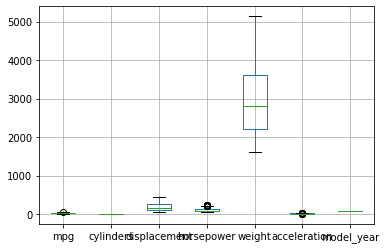

In [4]:
mpg.boxplot() # weight가 너무 커서 영향을 많이 미칠 가능성이 있다. boxplot 그리는 이유 중 하나! ★★★
# 우리는 딥러닝 쓸거고, 그러면 지가 알아서 범위를 바꿔준다. 전통적인 머신러닝에서는 안되는 경우가 많다.

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler # 클래스이다 (카멜방식)
# 둘다 쓴다. VGG16에서 스탠다스 스케일러 쓰면 학습속도 향상된다.

In [6]:
mm = MinMaxScaler() # 클래스라서 인스턴스화 했다.
mm.fit_transform(mpg[['mpg']]) # fit + transform의 형태이다.

array([[0.2393617 ],
       [0.15957447],
       [0.2393617 ],
       [0.18617021],
       [0.21276596],
       [0.15957447],
       [0.13297872],
       [0.13297872],
       [0.13297872],
       [0.15957447],
       [0.15957447],
       [0.13297872],
       [0.15957447],
       [0.13297872],
       [0.39893617],
       [0.34574468],
       [0.2393617 ],
       [0.31914894],
       [0.4787234 ],
       [0.45212766],
       [0.42553191],
       [0.39893617],
       [0.42553191],
       [0.45212766],
       [0.31914894],
       [0.02659574],
       [0.02659574],
       [0.05319149],
       [0.        ],
       [0.4787234 ],
       [0.50531915],
       [0.42553191],
       [0.42553191],
       [0.26595745],
       [0.18617021],
       [0.21276596],
       [0.26595745],
       [0.2393617 ],
       [0.13297872],
       [0.13297872],
       [0.13297872],
       [0.13297872],
       [0.07978723],
       [0.10638298],
       [0.10638298],
       [0.2393617 ],
       [0.34574468],
       [0.265

## 이미지 스탠다드제이션

3개 계열이 있다.

1. load: 이미지를 로드
2. fetch: 데이터가 커서 데이터를 다운받는다 인터넷에서
3. make: 랜덤한 데이터를 생성해준다.

In [7]:
from sklearn.datasets import load_digits

In [8]:
data = load_digits()

In [9]:
dir(data) # dir쓰는 애들은 . 으로 접근할 수 있다.

['DESCR', 'data', 'images', 'target', 'target_names']

In [32]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

(1797, 8, 8)


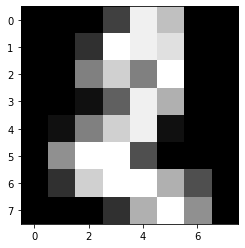

In [10]:
import matplotlib.pyplot as plt

print(data.images.shape)
plt.imshow(data.images[2], cmap='gray')

다시 mpg 데이터로 돌아가자.

In [11]:
from sklearn.neighbors import KNeighborsRegressor # mpg 데이터는 regression 데이터이다. 그래서 이걸 선택
knn = KNeighborsRegressor()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [12]:
vars(knn) # 인스턴스가 가지고 있는 값 확인

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

## 학습시키기

In [13]:
mpg.drop(columns = ['name', 'origin'], inplace = True)

In [14]:
mpg = mpg.fillna(method = 'backfill')

In [15]:
knn.fit(mpg.iloc[:, 1:], mpg.mpg)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

- 배치 방식: 
- 온라인 방식: 한문제 풀고 맞추고, 한문제 풀고 맞추고...
- 미니 배치: 단위별로 쪼개서 한다.

In [16]:
np_img = data.images

In [17]:
np_img2 = np_img.reshape(np_img.shape[0], -1)

In [18]:
np_img2.shape # 이게 x가 되는 것이다.

(1797, 64)

In [62]:
labels = data.target

In [63]:
labels.shape

(1797,)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(np_img2, labels) # 이제 이걸로 prediction을 할 수 있는 것이다.

NameError: name 'labels' is not defined

In [67]:
labels[0]

0

In [71]:
knn.predict(np_img2[[0]]) # shape가 안맞으므로, 이렇게 할 수 있다.

array([0])

즉, 이미지라도 머신러닝 기법써서 맞출 수 있는 것이다.

그런데 이미지가 중앙에 있어야 한다. 만약 중간에 없으면, 매우 성능이 나빠진다.

## Hold-out 기법

- 2way holdout: train test
- 3way holdout: train test validation

stratify 굉장히 좋다. 클래스 불균형 문제 한번에 해결!

In [100]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = train_test_split(np_img2, labels, test_size = 0.3, 
                                                                    random_state = 11234,
                                                                    stratify = labels# ★표본을 타겟 분포 기준으로 나눠준다. 절대적으로 성능이 좋아진다.
                                                                   )


In [101]:
print(train_input.shape)
print(train_label.shape)
print(test_input.shape)
print(test_label.shape)

(1257, 64)
(1257,)
(540, 64)
(540,)


In [102]:
knn = KNeighborsClassifier()

In [103]:
knn.fit(train_input, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
knn.score(test_input, test_label)

0.9851851851851852

딥러닝은 학습시간은 느리지만 예측속도는 엄청 빠르다. 그래서 산업현장에 적용하기가 아주 좋다. svm을 아직도 쓰는 이유가 속도가 극악으로 느리지만, 성능은 괜찮기 때문이다. 

In [105]:
from sklearn.datasets import fetch_openml # 여기서도 mnist같은 데이터 있다. 여기서 가져와서 연습해보면 된다.

### 노멀라이징 해서 성능 비교

In [106]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_input_norm = ss.fit_transform(train_input)
test_input_norm = ss.fit_transform(test_input)

In [107]:
knn2 = KNeighborsClassifier()
knn2.fit(train_input_norm, train_label)

knn2.score(test_input_norm, test_label) # 오히려 정확도가 떨어졌다.

0.9814814814814815

성능이 오히려 떨어졌다. 데이터가 워낙 잘되어 있기 때문에, 오히려 노말라이징 한게 역효과가 난 것이다.

그런데 랜덤 스테이츠를 바꾸면 또 성능이 바뀐다. 랜덤으로 했을 때, 성능이 바뀐다는 것은 오버피팅 되었다는 것이다. ★★★

선생님의 경우, 70% 넘으면 오버피팅 확인을 한다. 그래서 크로스 밸리데이션을 하는 것이다. ☆☆☆

10 폴드 벨리데이션은 이런 랜덤 과정을 10번 하는 것과 동일하다. 또한 편차까지 존재한다.

그러면 왜 크로스밸리데이션 안하고, 홀드아웃만 쓸까? 귀찮아서 이다 ㅋ

In [108]:
from sklearn.model_selection import cross_val_score

cross_val_score(KNeighborsClassifier(), np_img2, labels, cv = 10) # 실무에서는 10을 많이 쓴다.

array([0.92972973, 0.98907104, 0.97790055, 0.97777778, 0.96648045,
       0.98324022, 0.98882682, 0.98314607, 0.97740113, 0.96590909])

편차가 6이므로, 모델 안정화가 좀 필요한 것이다. 알고리즘 특성상 데이터가 더 필요한 것이다.

In [111]:
from sklearn.ensemble import RandomForestClassifier

cross_val_score(RandomForestClassifier(), np_img2, labels, cv = 10) # knn보다 더 편차가 크다. 이 알고리즘도 데이터가 더 필요하다.

C:\Users\white\Anaconda3\envs\tf2.0-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\white\Anaconda3\envs\tf2.0-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\white\Anaconda3\envs\tf2.0-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\white\Anaconda3\envs\tf2.0-gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\white\A

array([0.88648649, 0.95081967, 0.91160221, 0.91666667, 0.91061453,
       0.96648045, 0.93854749, 0.93820225, 0.93785311, 0.89772727])

이렇게 크로스 밸리데이션 하면 오버피팅 일어났는지 알아보는데 좋다. 저 위에 어레이에서 편차가 좀 있으면 오버피팅 됬다고 보면 된다.


★★★★★ <br>
그럼 홀드아웃은 왜 하나? 가지고 있는 모든 데이터를 전부 다 재학습 시켜야 한다. 크로스밸리데이션에서 끝난게 아니다. 다시 하이퍼파라미터 맞춰서 전부 다 학습 시켜야 한다. 데이터는 소중하니까!

머신러닝 교과서, introduction to Machine learning with Python (칼라 도마뱀!)